In [2]:
import sys
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [3]:
def make_neural_network(first_layer=5, second_layer=5, first_func='tanh', second_func='tanh',):
    model = Sequential()
    model.add(Dense(first_layer, activation=first_func))
    model.add(Dense(second_layer, activation=second_func))
    model.add(Dense(1, activation='linear'))
    return model

In [4]:
NoS = 150

In [5]:
X = np.random.uniform(0, 2 * np.pi, size=(NoS, 1))
Y = np.sin(X) + np.random.normal(0, 0.3, size=(NoS, 1))

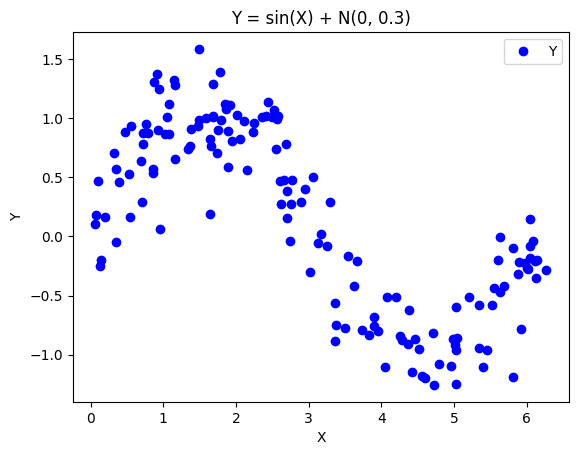

In [6]:
plt.figure()
plt.plot(X, Y, 'bo')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Y = sin(X) + N(0, 0.3)')
plt.legend('Y = f(x)')
plt.show()

In [22]:
model1 = make_neural_network(5, 5, 'tanh', 'tanh')
model2 = make_neural_network(5, 5, 'sigmoid', 'sigmoid')
model3 = make_neural_network(5, 5, 'relu', 'relu')

In [23]:
optim1 = Adam(learning_rate=0.01,
             beta_1=0.9,
             beta_2=0.999,
             epsilon=1e-07)
optim2 = Adam(learning_rate=0.01,
             beta_1=0.9,
             beta_2=0.999,
             epsilon=1e-07)
optim3 = Adam(learning_rate=0.01,
             beta_1=0.9,
             beta_2=0.999,
             epsilon=1e-07)

model1.compile(optimizer=optim1, loss='mean_squared_error', metrics=['mean_squared_error'])
model2.compile(optimizer=optim2, loss='mean_squared_error', metrics=['mean_squared_error'])
model3.compile(optimizer=optim3, loss='mean_squared_error', metrics=['mean_squared_error'])

In [25]:
hist1 = model1.fit(X, Y, epochs=250, verbose=1, batch_size=150, validation_split=0.2)
hist2 = model2.fit(X, Y, epochs=250, verbose=1, batch_size=150, validation_split=0.2)
hist3 = model3.fit(X, Y, epochs=250, verbose=1, batch_size=150, validation_split=0.2)

Epoch 1/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 2.3948 - mean_squared_error: 2.3948 - val_loss: 1.3132 - val_mean_squared_error: 1.3132
Epoch 2/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 1.8926 - mean_squared_error: 1.8926 - val_loss: 0.9771 - val_mean_squared_error: 0.9771
Epoch 3/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 1.4598 - mean_squared_error: 1.4598 - val_loss: 0.7122 - val_mean_squared_error: 0.7122
Epoch 4/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 1.1006 - mean_squared_error: 1.1006 - val_loss: 0.5195 - val_mean_squared_error: 0.5195
Epoch 5/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.8165 - mean_squared_error: 0.8165 - val_loss: 0.3979 - val_mean_squared_error: 0.3979
Epoch 6/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.6073 - mean_squared_error: 0.6073 - val_loss: 0.3433 - val_mean_squared_error: 0.3433
Epoch 7/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.4700 - mean_squared_error: 0.4700 - val_loss: 0.3477 - val_mean_sq

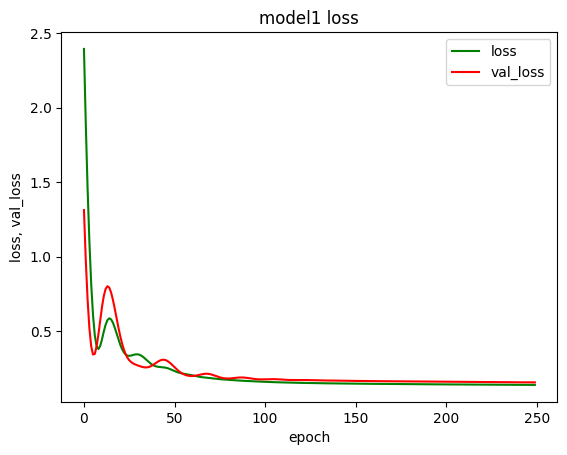

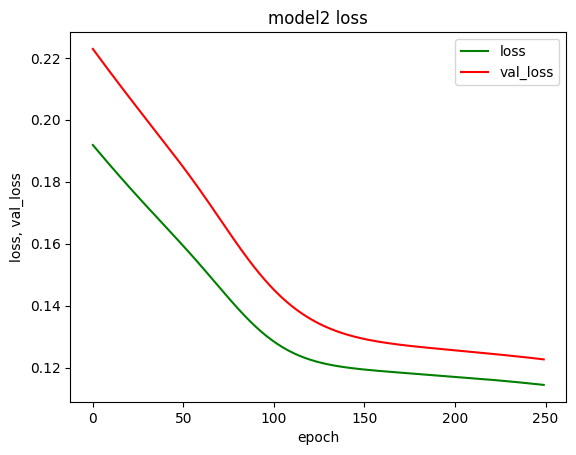

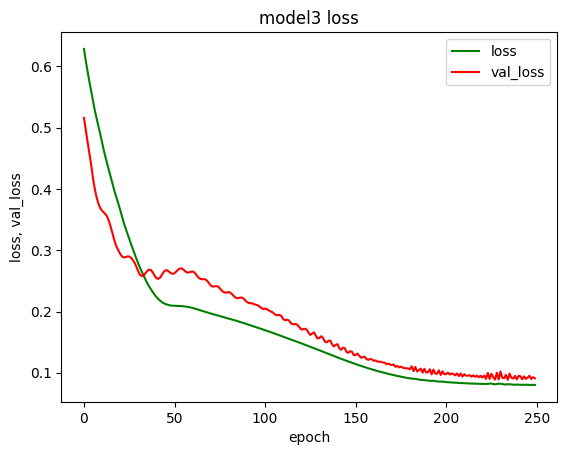

In [26]:
plt.figure()
plt.plot(hist1.history['loss'], '-g', label='loss')
plt.plot(hist1.history['val_loss'], '-r', label='val_loss')
plt.title('model1 loss')
plt.ylabel('loss, val_loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'])

plt.figure()
plt.plot(hist2.history['loss'], '-g', label='loss')
plt.plot(hist2.history['val_loss'], '-r', label='val_loss')
plt.title('model2 loss')
plt.ylabel('loss, val_loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'])

plt.figure()
plt.plot(hist3.history['loss'], '-g', label='loss')
plt.plot(hist3.history['val_loss'], '-r', label='val_loss')
plt.title('model3 loss')
plt.ylabel('loss, val_loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'])

In [27]:
YPred1 = model1.predict(X)
YPred2 = model2.predict(X)
YPred3 = model3.predict(X)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/stepWARNING:tensorflow:5 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000023BF8A81D80> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


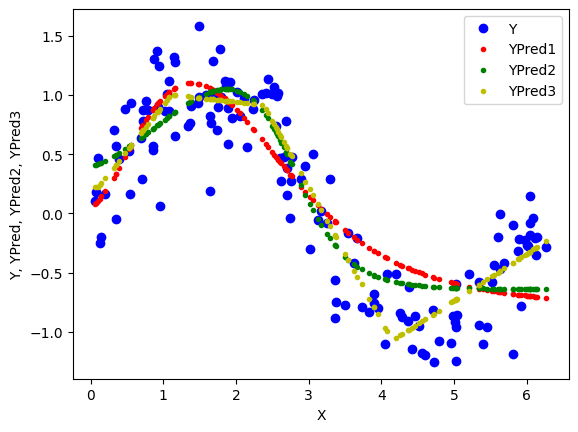

In [28]:
plt.figure()
plt.plot(X, Y, 'bo', label='Y')
plt.plot(X, YPred1, 'r.', label='YPred1')
plt.plot(X, YPred2, 'g.', label='YPred2')
plt.plot(X, YPred3, 'y.', label='YPred3')
plt.xlabel('X')
plt.ylabel('Y, YPred, YPred2, YPred3')
plt.legend(['Y', 'YPred1', 'YPred2', 'YPred3'])

In [29]:
XTest = np.random.uniform(0, 2 * np.pi, size=(NoS, 1))
YTest = np.sin(XTest) + np.random.normal(0, 0.3, size=(NoS, 1))

In [30]:
YTestPred1 = model1.predict(XTest)
YTestPred2 = model2.predict(XTest)
YTestPred3 = model3.predict(XTest)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


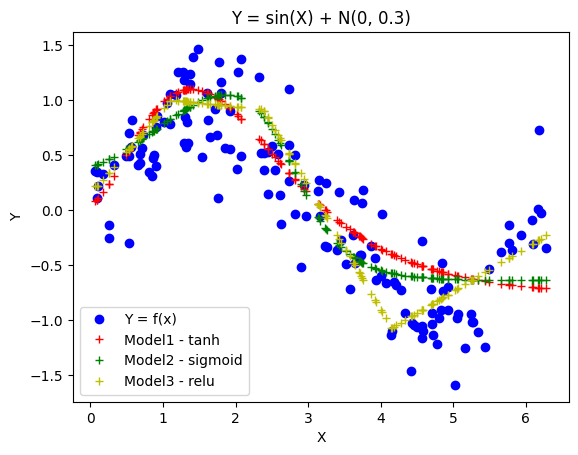

In [31]:
plt.figure()
plt.plot(XTest, YTest, 'bo', label='Y')
plt.plot(XTest, YTestPred1, 'r+', label='YPred1')
plt.plot(XTest, YTestPred2, 'g+', label='YPred2')
plt.plot(XTest, YTestPred3, 'y+', label='YPred3')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Y = sin(X) + N(0, 0.3)')
plt.legend(['Y = f(x)', 'Model1 - tanh', 'Model2 - sigmoid', 'Model3 - relu'])